<a href="https://colab.research.google.com/github/DanielPavicic/AIDA/blob/master/Graph_Quest_NetworkX_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# import library
import networkx as nx

In [69]:
# create an empty graph and call it G

G = nx.Graph()

In [70]:
# add node '1'
G.add_node(1)

In [71]:
print( nx.info(G) )

Name: 
Type: Graph
Number of nodes: 1
Number of edges: 0
Average degree:   0.0000


In [72]:
# add two nodes ('2' and '3') as a list [2, 3]
G.add_nodes_from([2, 3])

In [73]:
print( nx.info(G) )

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 0
Average degree:   0.0000


In [74]:
# add an edge between nodes 1 and 2
G.add_edge(1, 2)

In [75]:
print( nx.info(G) )

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 1
Average degree:   0.6667


In [76]:
# add edges between nodes 1 and 2, as well as 1 and 3 from a list
G.add_edges_from([(1, 2), (1, 3)])

In [77]:
print( nx.info(G) )

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


In [78]:
import matplotlib.pyplot as plt

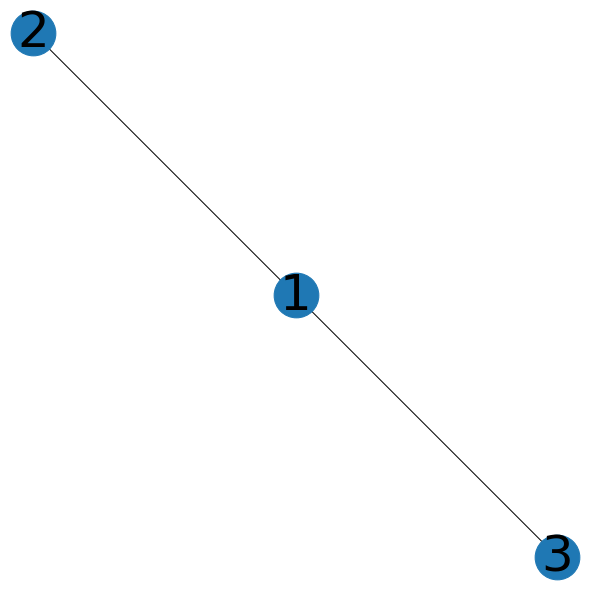

In [79]:
# draw the resulting G graph
plt.figure(figsize=(8,8))
nx.draw(G, node_size=2000, alpha=1, font_size=50, with_labels=True)
plt.show()

In [80]:
# create a random Erdos-Renyi graph (call it H) with 10 nodes and a connection probability of 0.3

H = nx.erdos_renyi_graph(10, 0.3)

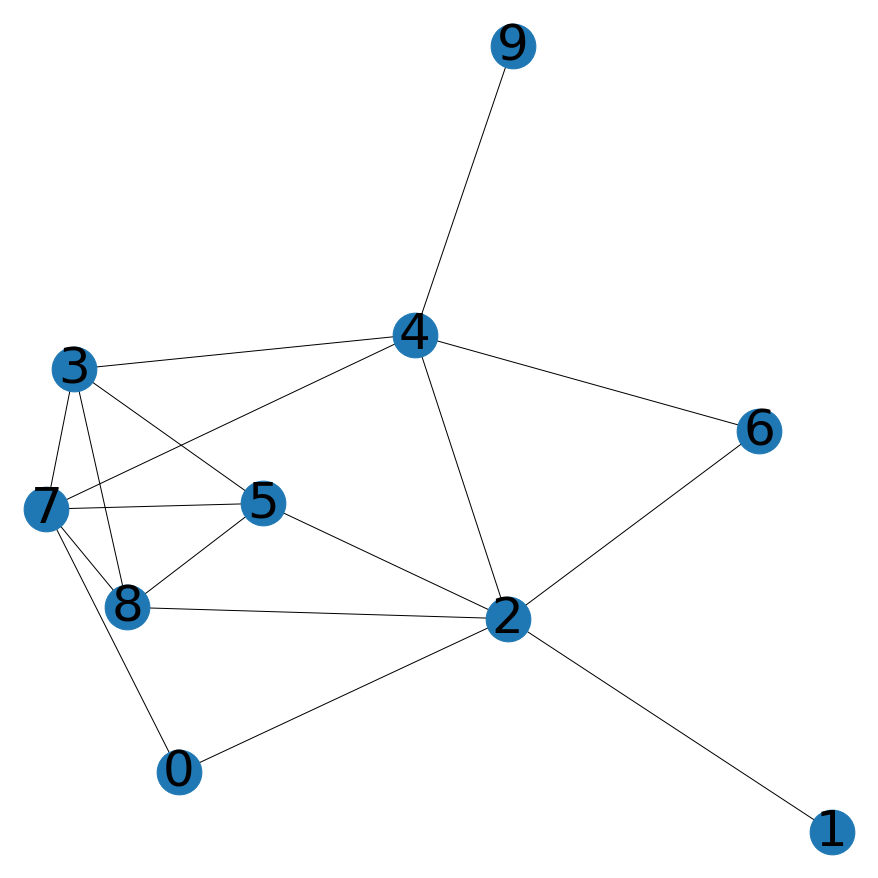

In [81]:
plt.figure(figsize=(12,12))
nx.draw( H, node_size=2000, alpha=1, font_size=50, with_labels=True)
plt.show()

In [82]:
# add edges from H to G and compare the graphs
G.add_edges_from( H.edges ) 

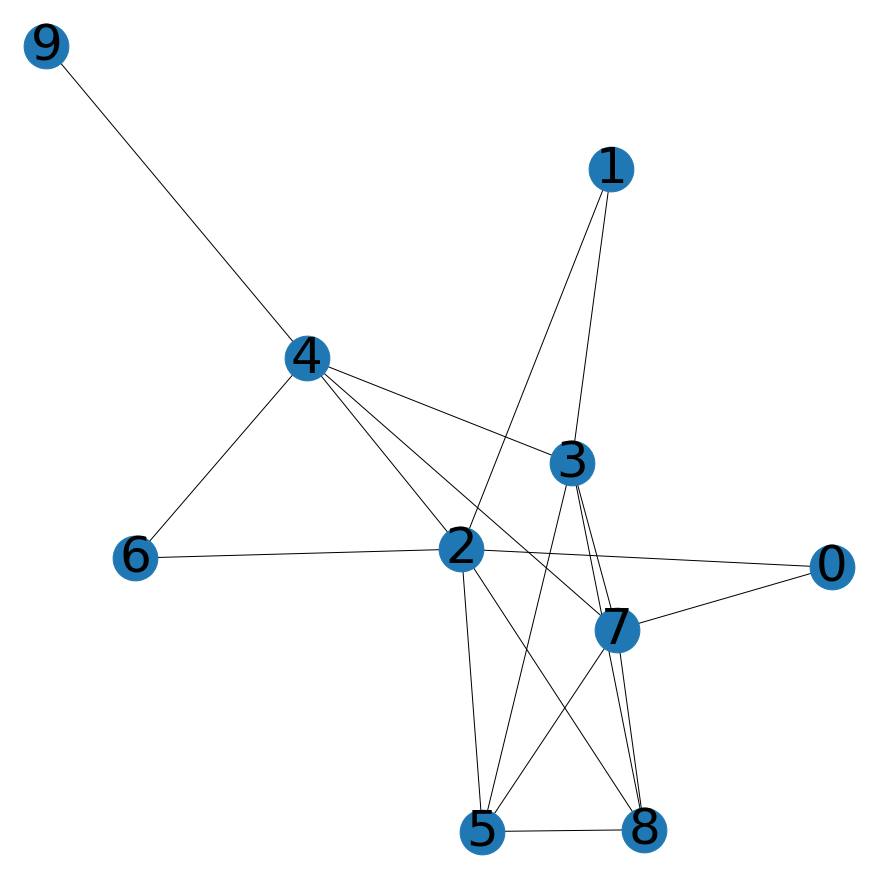

In [83]:
# check the result
plt.figure(figsize=(12,12))
nx.draw( G, node_size=2000, alpha=1, font_size=50, with_labels=True)
plt.show()

In [84]:
# print nodes & edges counts of G and H
print( G.number_of_nodes() )
print( G.number_of_edges() )
print( H.number_of_nodes() )
print( H.number_of_edges() )


10
18
10
17


In [85]:
# remove node 2 and edge between nodes 1 and 3 in graph G
G.remove_node(2)
G.remove_edge(1, 3)

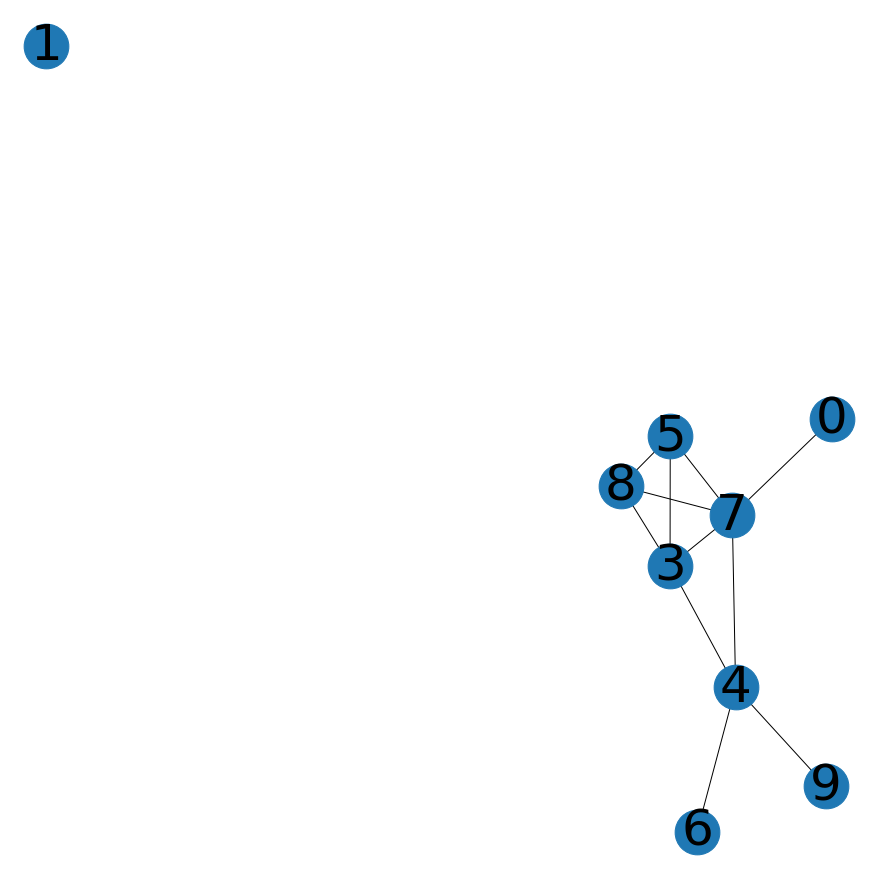

In [86]:
plt.figure(figsize=(12,12))
nx.draw( G, node_size=2000, alpha=1, font_size=50, with_labels=True)
plt.show()

In [87]:
# convert graph H to a directed graph H_dir and visualize it

H_dir = nx.DiGraph( H )

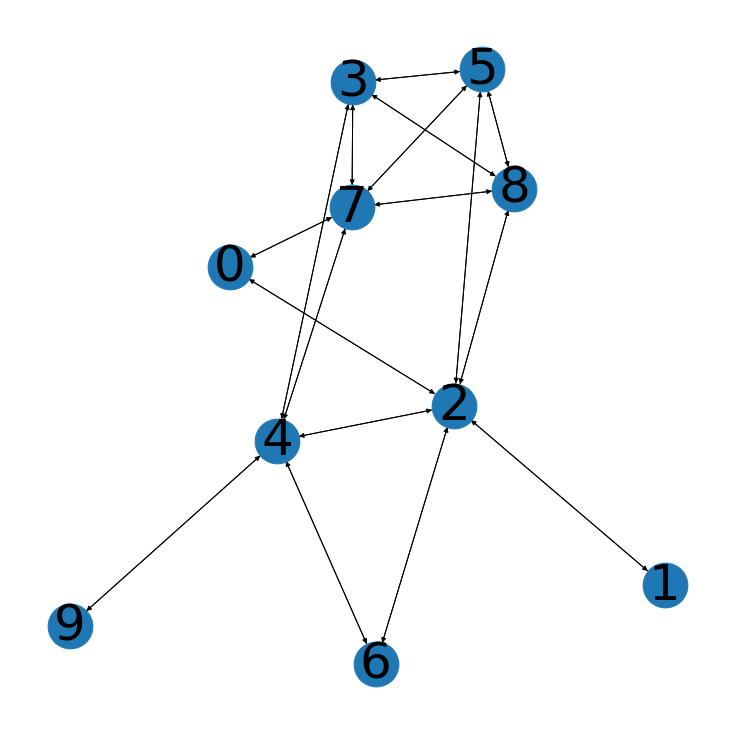

In [88]:
plt.figure(figsize=(10,10))
nx.draw( H_dir, node_size=2000, alpha=1, font_size=50, with_labels=True)
plt.show()

# Some own experiments

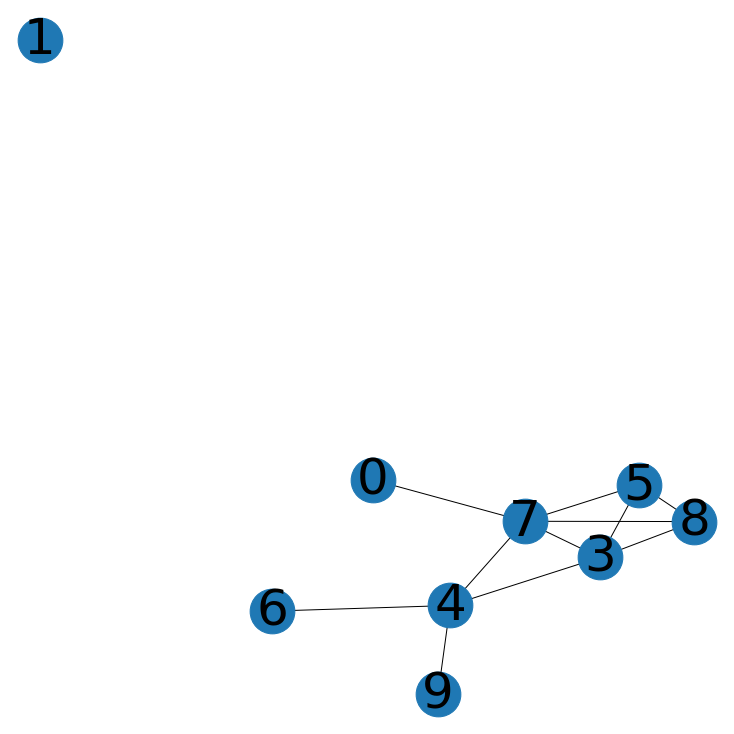

In [89]:
plt.figure(figsize=(10,10))
nx.draw( G, node_size=2000, alpha=1, font_size=50, with_labels=True)
plt.show()

## Jaccard (many common friends, but dont know each other yet)

In [90]:
preds = list(nx.jaccard_coefficient( G ))

In [91]:
preds = sorted(preds, key=lambda x: x[2], reverse=True)

In [92]:
preds

[(6, 9, 1.0),
 (4, 8, 0.4),
 (4, 5, 0.4),
 (0, 5, 0.3333333333333333),
 (0, 8, 0.3333333333333333),
 (0, 3, 0.25),
 (0, 4, 0.25),
 (3, 9, 0.25),
 (3, 6, 0.25),
 (6, 7, 0.2),
 (7, 9, 0.2),
 (0, 1, 0.0),
 (0, 6, 0.0),
 (0, 9, 0.0),
 (1, 3, 0.0),
 (1, 4, 0.0),
 (1, 5, 0.0),
 (1, 6, 0.0),
 (1, 7, 0.0),
 (1, 8, 0.0),
 (1, 9, 0.0),
 (5, 9, 0.0),
 (5, 6, 0.0),
 (6, 8, 0.0),
 (8, 9, 0.0)]

## Adamic-Adar

In [93]:
preds2 = list(nx.adamic_adar_index( G ))

In [94]:
preds2 = sorted(preds2, key=lambda x: x[2], reverse=True)

In [95]:
preds2

[(4, 8, 1.3426824550040934),
 (4, 5, 1.3426824550040934),
 (3, 9, 0.7213475204444817),
 (3, 6, 0.7213475204444817),
 (6, 9, 0.7213475204444817),
 (6, 7, 0.7213475204444817),
 (7, 9, 0.7213475204444817),
 (0, 3, 0.6213349345596119),
 (0, 4, 0.6213349345596119),
 (0, 5, 0.6213349345596119),
 (0, 8, 0.6213349345596119),
 (0, 1, 0),
 (0, 6, 0),
 (0, 9, 0),
 (1, 3, 0),
 (1, 4, 0),
 (1, 5, 0),
 (1, 6, 0),
 (1, 7, 0),
 (1, 8, 0),
 (1, 9, 0),
 (5, 9, 0),
 (5, 6, 0),
 (6, 8, 0),
 (8, 9, 0)]

## Centralities

In [96]:
import pandas as pd

In [97]:
pd.Series( nx.betweenness_centrality( G ) ).nlargest()

4    0.392857
7    0.321429
3    0.107143
1    0.000000
0    0.000000
dtype: float64

In [98]:
pd.Series( nx.degree_centrality( G ) ).nlargest()

7    0.625
3    0.500
4    0.500
5    0.375
8    0.375
dtype: float64

In [101]:
pd.Series( nx.closeness_centrality( G ) ).nlargest(10)

7    0.680556
3    0.612500
4    0.612500
5    0.471154
8    0.471154
0    0.408333
6    0.382812
9    0.382812
1    0.000000
dtype: float64

## Distance

In [100]:
nx.center( G , usebounds=True )

NetworkXError: ignored